# Geog 573 (675) Advanced Geocomputing and Geospatial Big Data Analytics
### Meiliu Wu (mwu233@wisc.edu)
### Topics: Shortest Path Algorithm and Street Network Analytics

# Dijkstra Algorithm for Shortest Path in undirected networks

In [1]:
import sys
import os
import math
import string

## Based on your own preference and thinking of Networks, choose one of the following class to implement the graph.

class Graph():
    def __init__(self, weighted_edges):
        # Implement the initlization here
        print ("initlization:")

    def getShortestPath(self,origin,destination):
        # Implement the method here
        print ("compute the shortest path from origin to destination:")
        return #  return the shortst path and its length
       

class Graph_AdjacencyMatrix():
    def __init__(self,adjM):
        # Implement the initlization here
        print ("initlization:")
        self.edges = adjM
        self.nodes = []
        
        # set up the nodes list
        nodesSize = len(adjM)
        for x, y in zip(range(len(adjM)), string.ascii_uppercase):
            self.nodes.append(y)
        print ('nodes:',self.nodes)
        print ('edges:',self.edges)
        print 
        #print('edges[0]: ',self.edges[0])
        
    def getShortestPath(self,origin,destination):
        # Implement the method here
        print ("compute the shortest path from origin to destination:")
        
        # set up distance list
        dList = {node: float("inf") for node in self.nodes}
        dList[origin] = 0
        #print(dList)
        
        # set up the parent for the list of nodes
        previous = {node: None for node in self.nodes}
        #print(previous)
        
        # set up queue list
        queue = self.nodes[:]
        
        while queue:
            current_vertex = min(queue, key=lambda node: dList[node]) # e.g., 'A'
            queue.remove(current_vertex)
            
            # detect unexpected error
            if dList[current_vertex] == float("inf") or current_vertex == destination:
                break
            
            # update the neighbors of the current node
            current_index = ord(current_vertex) - 65
            for i in range(len(dList)):
                neighbor = chr(65+i)
                dist = self.edges[current_index][i]
                if (dist > 0) and (neighbor in queue):
                    newD = dList[current_vertex] + dist
                    if newD < dList[neighbor]:
                        dList[neighbor] = newD
                        previous[neighbor] = current_vertex
        
        path = []
        temp = destination
        while temp:
            path.append(temp)
            temp = previous[temp]
                    
        path.reverse()
        
        #print "the shortest path:", path
        #print "the shortest path length:", dList[destination]
        return path, dList[destination] # return the shortst path and its length

if __name__ == "__main__":
    # option 1
#     weighted_edges = [("A", "B", 1), ("A", "C", 2),("B", "D", 2),("C", "D", 2),("D", "E", 1)]
#     print(weighted_edges)
#     new_g = Graph(weighted_edges)
#     new_g.getShortestPath("A","E")
    # option 2
    adjM=[[0, 1, 2, 0, 0], 
          [1, 0, 0, 2, 0], 
          [2, 0, 0, 2, 0], 
          [0, 2, 2, 0, 1], 
          [0, 0, 0, 1, 0]]; 
    #print(adjM)
    new_g = Graph_AdjacencyMatrix(adjM)
    
    origin = 'E'
    destination = 'A'
    print ("origin:",origin,"  destination:",destination)
    
    sP, length = new_g.getShortestPath(origin,destination)
    print ("the shortest path:", sP)
    print ("the shortest path length:", length)
    

initlization:
nodes: ['A', 'B', 'C', 'D', 'E']
edges: [[0, 1, 2, 0, 0], [1, 0, 0, 2, 0], [2, 0, 0, 2, 0], [0, 2, 2, 0, 1], [0, 0, 0, 1, 0]]
origin: E   destination: A
compute the shortest path from origin to destination:
the shortest path: ['E', 'D', 'B', 'A']
the shortest path length: 4


# OSMnx: Download and Create Street Networks from OpenStreetMap
Source URL: https://github.com/gboeing/osmnx <br>
Notebook Examples: https://github.com/gboeing/osmnx-examples/blob/master/notebooks/ <br>
Histograms:  a bar chart representing a frequency distribution https://matplotlib.org/gallery/statistics/hist.html

In [2]:
# import osmnx package
import osmnx as ox

In [4]:
# import other packages
import matplotlib.cm as cm, pandas as pd, numpy as np

In [5]:
# download a street network for a city via https://github.com/gboeing/osmnx 
# get the street network for a place, and its area in square meters
place = 'Redlands, California, USA'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='drive_service')

# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                   4301
m                                                                                  11003
k_avg                                                                            5.11648
intersection_count                                                                  3332
streets_per_node_avg                                                             2.68844
streets_per_node_counts                    {0: 0, 1: 969, 2: 36, 3: 2678, 4: 602, 5: 16}
streets_per_node_proportion            {0: 0.0, 1: 0.22529644268774704, 2: 0.00837014...
edge_length_total                                                            1.27109e+06
edge_length_avg                                                                  115.522
street_length_total                                                               681766
street_length_avg                                                                118.157
street_segments_count

Streets/intersection counts and proportions are nested dicts inside the stats dict. To convert these stats to a pandas dataframe (to compare/analyze multiple networks against each other), just unpack these nested dicts first:

In [7]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats['streets_per_node_counts'].items():
    stats['int_{}_count'.format(k)] = count
for k, proportion in stats['streets_per_node_proportion'].items():
    stats['int_{}_prop'.format(k)] = proportion

# delete the no longer needed dict elements
del stats['streets_per_node_counts']
del stats['streets_per_node_proportion']

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats)).T

,n,m,k_avg,intersection_count,streets_per_node_avg,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,...,int_2_count,int_3_count,int_4_count,int_5_count,int_0_prop,int_1_prop,int_2_prop,int_3_prop,int_4_prop,int_5_prop
0,4301.0,11003.0,5.116485,3332.0,2.688445,1271093.324,115.522432,681766.382,118.157085,5770.0,...,36.0,2678.0,602.0,16.0,0.0,0.225296,0.00837,0.622646,0.139967,0.00372


Compute the three centrality measures (degree, closeness, betweenness) for the city street network. Choose "nodes" for computing the centrality scores (More details can be found in the Notebook Examples). 

## 1. Inspect degree centrality

In [39]:
# 1. Degree Centrality: the number of nearest neighbors to node i
# n = 4301 # the total number of nodes in the network
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['degree_centrality'].items(), key=lambda x: x[1])
print(max_node, max_bc * (4301-1))
min_node, min_bc = min(extended_stats['degree_centrality'].items(), key=lambda x: x[1])
print(min_node, min_bc * (4301-1))
# convert the normalized degree centrality to a actual number

54796526 9.0
5902901696 1.0


In the city of Redlands, California, the node with the highest degree centrality has 9 nearest neighbors. Let's highlight it in the plot:

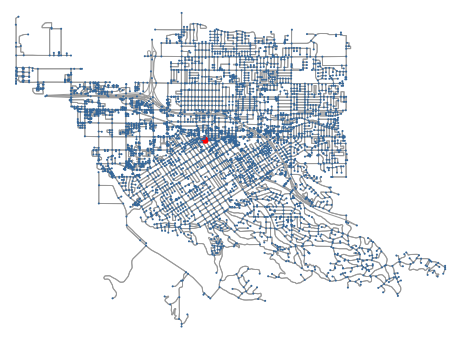

In [40]:
nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
ns = [50 if node==max_node else 4 for node in G_projected.nodes()]
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

9 nodes are the nearest neigbors to the node highlighted in red (located in Downtown Redlands). Let's look at the relative degree centrality of every node in the graph:

In [10]:
# functions for assigning a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

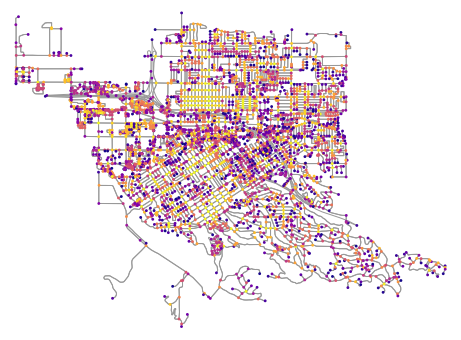

In [41]:
# For visualizations of each centrality type: Maps and Histograms. 
nc = get_node_colors_by_stat(G_projected, data=extended_stats['degree_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_size=8, node_zorder=2)

Above, the nodes are visualized by degree centrality, from low (dark violet) to high (light yellow).

In [49]:
dgList = list()
for key in extended_stats['degree_centrality']:
    dgList.append(int(extended_stats['degree_centrality'][key] * (4301-1)))
print("done")

done


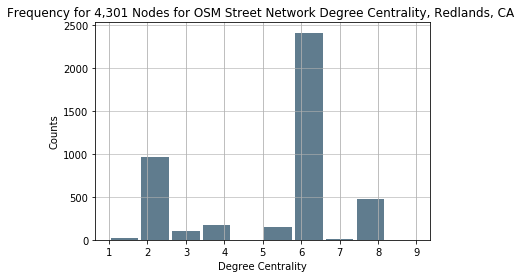

In [51]:
# Generate data on commute times.
dg = pd.Series(dgList)
dg.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Frequency for 4,301 Nodes for OSM Street Network Degree Centrality, Redlands, CA ')
plt.xlabel('Degree Centrality')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

#### Comment on the findings on the betweenness centrality distributions
Only a large proportion (almost 58%) of the nodes have 6 nearest neighbors. They are mostly in the residential areas in the north and south of downtown. 

## 2. Inspect clossness centrality

In [52]:
# 2. Clossness centrality: quantifies how close node i to all the other nodes in a network along the shortest paths
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['closeness_centrality'].items(), key=lambda x: x[1])
print(max_node, max_bc)
min_node, min_bc = min(extended_stats['closeness_centrality'].items(), key=lambda x: x[1])
print(min_node, min_bc)
# normalized closeness centrality

54513045 0.00032720910187399694
1071241402 0.0


In the city of Redlands, California, 0.00033 is the highest clossness centrality for all the nodes. Let's highlight the node with highest clossness centrality in the plot:

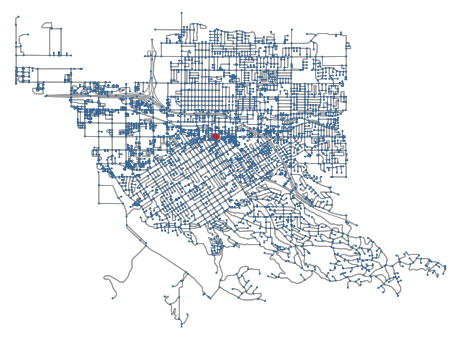

In [53]:
nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
ns = [50 if node==max_node else 4 for node in G_projected.nodes()]
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

The node with highest clossness centrality is highlighted in red (located in Downtown Redlands). Let's look at the relative clossness centrality of every node in the graph:

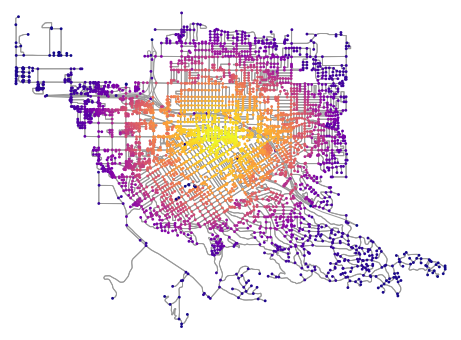

In [54]:
# For visualizations of each centrality type: Maps and Histograms. 
nc = get_node_colors_by_stat(G_projected, data=extended_stats['closeness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_size=8, node_zorder=2)

Above, the nodes are visualized by clossness centrality, from low (dark violet) to high (light yellow).

In [59]:
clList = list()
for key in extended_stats['closeness_centrality']:
    clList.append(extended_stats['closeness_centrality'][key]*10000)
print("done")

done


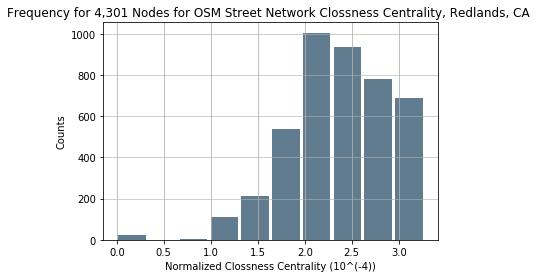

In [64]:
# Generate data on commute times.
cl = pd.Series(clList)
cl.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Frequency for 4,301 Nodes for OSM Street Network Clossness Centrality, Redlands, CA ')
plt.xlabel('Normalized Clossness Centrality (10^(-4))')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

#### Comment on the findings on the betweenness centrality distributions
Only a large proportion (almost 93%) of the nodes have clossness centrality larger than or equal to 0.000175, and the larger it is, the closer it is to the certer of the network, i.e., the value of clossness centrality is decreasing from the center to the perimeter.

## 3. Inspect betweenness centrality

In [37]:
# 3. Betweenness centrality: quantifies how often the shortest paths going through the node i
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
print(max_node, max_bc)
min_node, min_bc = min(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
print(min_node, min_bc)
# normalized betweenness centrality

54407459 0.2218177660492977
4587716636 0.0


In the city of Redlands, California, the node with the highest betweenness centrality has 22.18% of all shortest paths running through it. Let's highlight it in the plot:

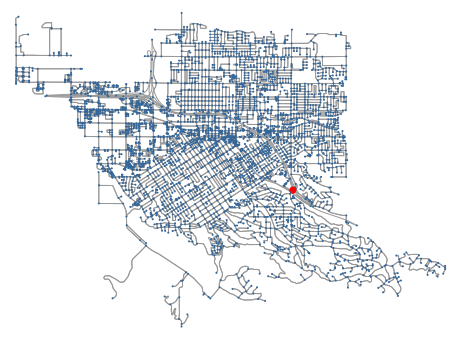

In [13]:
nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
ns = [50 if node==max_node else 4 for node in G_projected.nodes()]
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

22.18% of all shortest paths run through the node highlighted in red. Let's look at the relative betweenness centrality of every node in the graph:

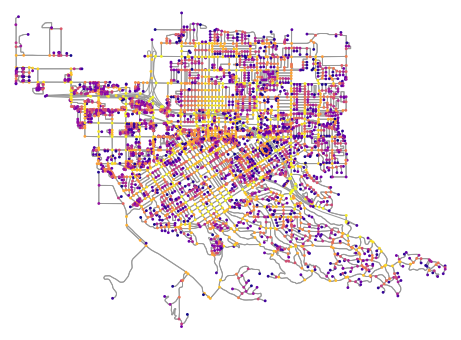

In [16]:
# For visualizations of each centrality type: Maps and Histograms. 
nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_size=8, node_zorder=2)

Above, the nodes are visualized by betweenness centrality, from low (dark violet) to high (light yellow).

In [24]:
btwList = list()
for key in extended_stats['betweenness_centrality']:
    btwList.append(extended_stats['betweenness_centrality'][key])
print("done")

done


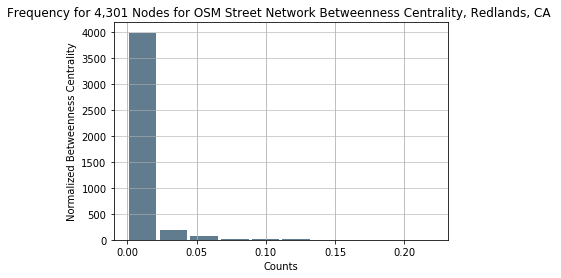

In [35]:
# Generate data on commute times.
btw = pd.Series(btwList)
btw.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Frequency for 4,301 Nodes for OSM Street Network Betweenness Centrality, Redlands, CA ')
plt.xlabel('Normalized Betweenness Centrality')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

#### Comment on the findings on the betweenness centrality distributions
Only a small proportion (7%) of the nodes have a relatively higher value of betweenness centrality. They are mostly in Downtown Redlands, along the highways, or in the residential areas in the north and south of downtown. 

# Lab 4 Tasks (20 pts)

### Hand-in  (Assigned: 03/28/2019; Due: 04/11/2019)
•	Please collect your answers into Jupyter notebooks .ipynb or .py files called lab4_yourname.ipynb or lab4_yourname.py  <br>
•   Submit all the code and data files to the assignment folder called “Lab 4 Submission”. Notice that if you are using GIS shapefile for street networks, you should upload all the associated files with the same name not just the .shp file.<br>
•	Include appropriate comments to explain what each line or block of code accomplishes. You must comment your code for full credit. <br>

Question (1) Finish your Python code for computing the shortest path for an undirected graph.  <br>
Question (2) Use the OSMnx open-source python tool, download a street network for a city (e.g., Madison, WI). Compute and visualize the three centrality measures (degree, closeness, betweenness) for the city street network that you downloaded. You can choose either "nodes" or "edges" for computing the centrality scores (More details can be found in the Notebook Examples). For visualizations, two kinds of visualization products should be included for each type of centrality: Maps and Histograms. Comment on your findings on the centrality distributions. 